In [78]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# split the clustering and data 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans  
#filtering warning 
import warnings
warnings.filterwarnings('ignore') # this is used to ignore all the warning messages. 
sns.set_theme(style='whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [79]:
df=pd.read_csv(r'C:\Users\swastik\Downloads\german_credit_data.csv')


In [80]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


PERFORMING EDA 

In [81]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [82]:
df.shape

(1000, 11)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


There are some missing values in the 'Saving accounts and Checking account column'

In [84]:
df.isnull().sum() # checking the number of null values in the column 

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [85]:
df.duplicated().sum() # checking for duplicated values in the dataframe 

np.int64(0)

In [86]:
# we can change the "Sex" and "Risk" into 0, 1. 1- bad risk and male,  0- good risk and female 
df['Risk']=df['Risk'].map({'bad':1, 'good':0})
df['Sex']=df['Sex'].map({'male':1, 'female':0})

In [87]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,0,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,1,1,own,little,NaN,2096,12,education,0
3,3,45,1,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,1,2,free,little,little,4870,24,car,1
5,5,35,1,1,free,NaN,NaN,9055,36,education,0
6,6,53,1,2,own,quite rich,NaN,2835,24,furniture/equipment,0
7,7,35,1,3,rent,little,moderate,6948,36,car,0
8,8,61,1,1,own,rich,NaN,3059,12,radio/TV,0
9,9,28,1,3,own,little,moderate,5234,30,car,1


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Job'}>,
        <Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Risk'}>, <Axes: >, <Axes: >]],
      dtype=object)

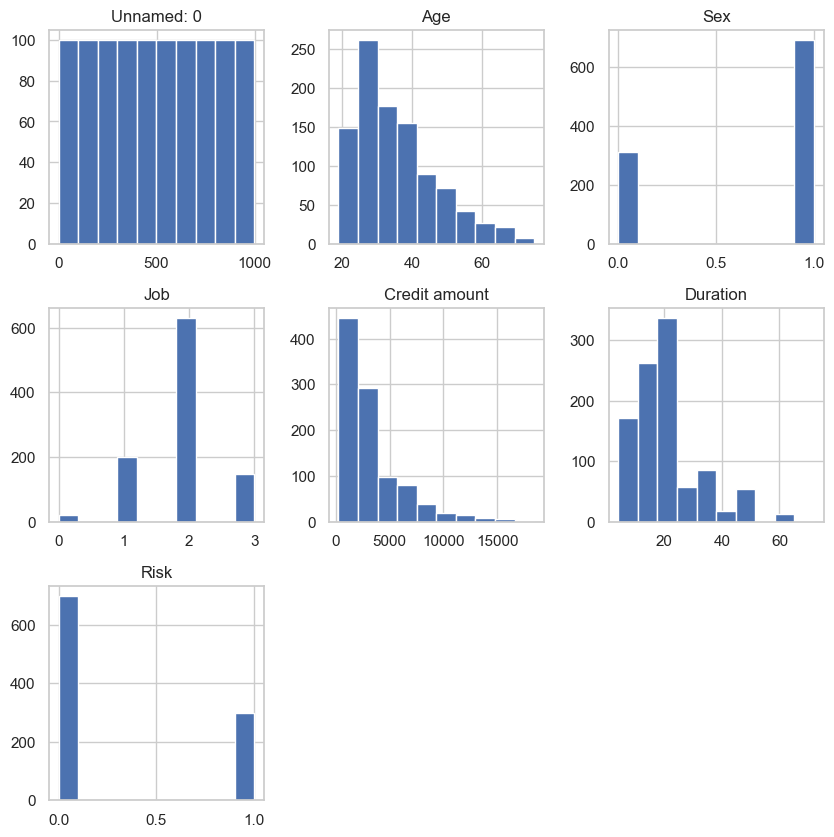

In [88]:
# to  check the distribution of numerical feature 
df.hist(figsize=(10, 10))

<Axes: xlabel='Age'>

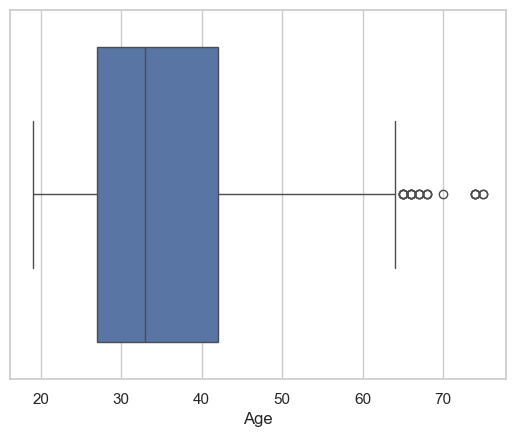

In [89]:
sns.boxplot(x=df['Age']) # to check for outliers in age 

<Axes: xlabel='Housing', ylabel='count'>

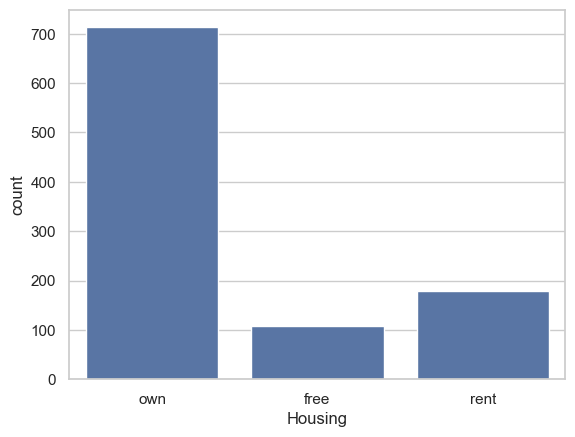

In [90]:
sns.countplot(x='Housing', data=df)  # Example for the 'Housing' column


<Axes: xlabel='Age', ylabel='Credit amount'>

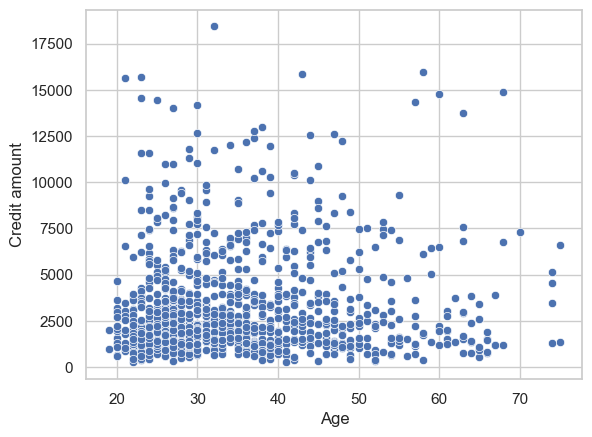

In [91]:
sns.scatterplot(x='Age', y='Credit amount', data=df)


<Axes: xlabel='Risk', ylabel='Age'>

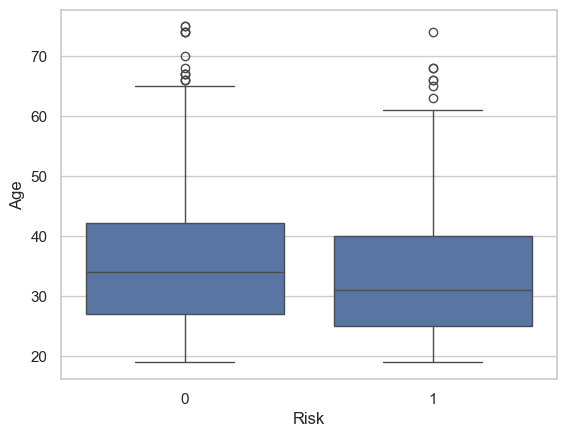

In [92]:
sns.boxplot(x='Risk', y='Age', data=df)  # Example for Age vs Risk


In [93]:
# handling the missing values by dropping the values 
df=df.dropna()

In [94]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [95]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,0,2,own,little,moderate,5951,48,radio/TV,1
3,3,45,1,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,1,2,free,little,little,4870,24,car,1
7,7,35,1,3,rent,little,moderate,6948,36,car,0
9,9,28,1,3,own,little,moderate,5234,30,car,1
10,10,25,0,2,rent,little,moderate,1295,12,car,1
11,11,24,0,2,rent,little,little,4308,48,business,1
12,12,22,0,2,own,little,moderate,1567,12,radio/TV,0
13,13,60,1,1,own,little,little,1199,24,car,1
14,14,28,0,2,rent,little,little,1403,15,car,0


In [112]:
# separating the columns for model training 
# Drop the unnamed column
df = df.drop(columns=['Unnamed: 0'])

# Separate the features (X) and target (y)
X = df.drop(columns=['Risk'])  # Drop the 'Risk' column to get features
y = df['Risk']  # 'Risk' is the target variable



In [113]:
X.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,own,little,moderate,5951,48,radio/TV
3,45,1,2,free,little,little,7882,42,furniture/equipment
4,53,1,2,free,little,little,4870,24,car
7,35,1,3,rent,little,moderate,6948,36,car
9,28,1,3,own,little,moderate,5234,30,car
10,25,0,2,rent,little,moderate,1295,12,car
11,24,0,2,rent,little,little,4308,48,business
12,22,0,2,own,little,moderate,1567,12,radio/TV
13,60,1,1,own,little,little,1199,24,car
14,28,0,2,rent,little,little,1403,15,car


In [114]:
#encoding the columns into numerical values for training 
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encoding categorical columns
label_encoder = LabelEncoder()

X['Saving accounts'] = label_encoder.fit_transform(df['Saving accounts'])
X['Checking account'] = label_encoder.fit_transform(df['Checking account'])

#one hot encoding 
X = pd.get_dummies(X, columns=['Purpose'], drop_first=True)
X= pd.get_dummies(X, columns=['Housing'], drop_first=True)

In [115]:
X.head(10)

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_own,Housing_rent
1,22,0,2,0,1,5951,48,False,False,False,False,True,False,False,True,False
3,45,1,2,0,0,7882,42,False,False,False,True,False,False,False,False,False
4,53,1,2,0,0,4870,24,True,False,False,False,False,False,False,False,False
7,35,1,3,0,1,6948,36,True,False,False,False,False,False,False,False,True
9,28,1,3,0,1,5234,30,True,False,False,False,False,False,False,True,False
10,25,0,2,0,1,1295,12,True,False,False,False,False,False,False,False,True
11,24,0,2,0,0,4308,48,False,False,False,False,False,False,False,False,True
12,22,0,2,0,1,1567,12,False,False,False,False,True,False,False,True,False
13,60,1,1,0,0,1199,24,True,False,False,False,False,False,False,True,False
14,28,0,2,0,0,1403,15,True,False,False,False,False,False,False,False,True


In [116]:
# using train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# now using different types of models to train the data and checking the scores

In [117]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [118]:
# Initialize the model
log_reg = LogisticRegression()
# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [119]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))
print('Classification Report:')
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.5714285714285714
Confusion Matrix:
[[36 19]
 [26 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.65      0.62        55
           1       0.56      0.48      0.52        50

    accuracy                           0.57       105
   macro avg       0.57      0.57      0.57       105
weighted avg       0.57      0.57      0.57       105



In [120]:
# Initialize the model
rf = RandomForestClassifier()
# Train the model on the training data
rf.fit(X_train, y_train)


RandomForestClassifier()

In [121]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5619047619047619
Confusion Matrix:
[[35 20]
 [26 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        55
           1       0.55      0.48      0.51        50

    accuracy                           0.56       105
   macro avg       0.56      0.56      0.56       105
weighted avg       0.56      0.56      0.56       105



In [124]:
# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']